# Flow field & Tracking

In this tutorial you will learn to measure the flow field and track individual bubble.
    
The tutorial is divided in the following sections:
- Import libraries
- Quantification folders
- Get familiar with the input data
- Velocity field
- Combine tracking
- Tracked properties

## A) Import libraries

In [1]:
from FoamQuant import *
import numpy as np
import skimage as ski 
import os
import matplotlib.pyplot as plt; plt.rc('font', size=20) 
from tifffile import imread
from scipy import ndimage
import pickle as pkl
import pandas as pd

## B) Quantification folders

In [2]:
# Processing folders names
Quant_Folder = ['Q3_Bubble_Prop','Q7_Tracking']

# Create the quantification folders (where we are going to save our results)
for Pi in Quant_Folder:
    if  os.path.exists(Pi):
        print('path already exist:',Pi)
    else:
        print('Created folder:',Pi)
        os.mkdir(Pi)

path already exist: Q3_Bubble_Prop
path already exist: Q7_Tracking


## C) Get familiar with the input data
Let's read the first bubble-segmented image of the series (with no bubble on the edges). 

/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/Jupy_FoamQuant/FoamQuant/Figure.py:90: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


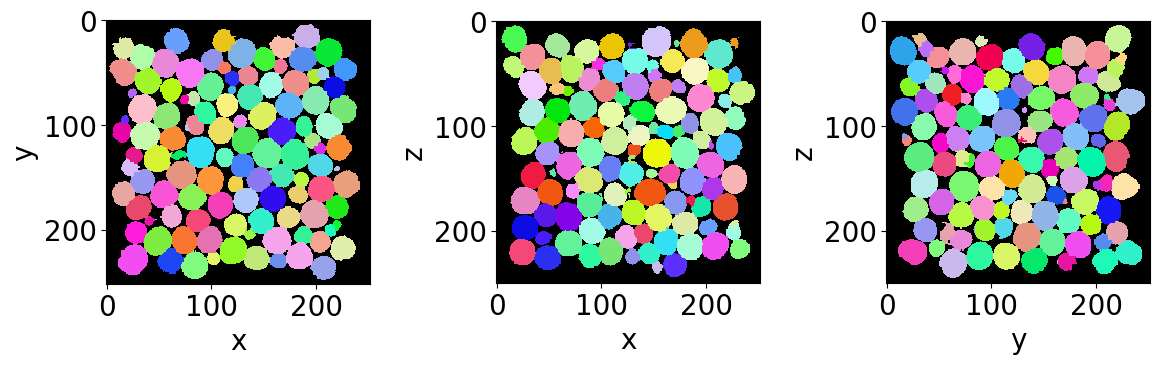

In [3]:
# Name and directory of  the no-edge bubble segmented images
dirnoedge = 'P5_BubbleNoEdge/'
namenoedge = 'BubbleNoEdge_'

# Read the first image of the series
Lab = imread(dirnoedge+namenoedge+strindex(1, 3)+'.tiff')

# Since we are now looking at more bubbles let's create a "larger" random colormap: here 500 random colors
rcmap = RandomCmap(500, verbose=False)

# Show a 3D-cut view of the volume
Cut3D(Lab,  
      nameaxes=['z','y','x'],
      cmap=rcmap, 
      interpolation='nearest', 
      figblocksize=4)

## B) Bubble tracking
The first step when tracking the bubbles is to extract their region properties. We are going to base our tracking on the centroid and the volume of them at consecutive time steps. 

In [4]:
# Name and directory where we are going to save the bubble region properties
dir_Bubble_prop = 'Q3_Bubble_Prop/'
name_Bubble_prop = 'Bubble_Prop_'

# Indexes of the images of our time-series (we are working here with 10 subsequent images of the same foam sample, evolving over time).
imrange = [1,2,3,4,5,6,7,8,9,10]

RegionProp_Batch(namenoedge,
                 name_Bubble_prop,
                 dirnoedge,
                 dir_Bubble_prop,
                 imrange,
                 verbose=True,
                 endread='.tiff',
                 endsave='.tsv')

Path exist: True
Bubble_Prop_001: done
Bubble_Prop_002: done
Bubble_Prop_003: done
Bubble_Prop_004: done
Bubble_Prop_005: done
Bubble_Prop_006: done
Bubble_Prop_007: done
Bubble_Prop_008: done
Bubble_Prop_009: done
Bubble_Prop_010: done


Now that we have the bubble region properties, we can use **LabelTracking_Batch** to track the bubble labels between two subsequent time steps. The tracking finds the closest centroid of the bubbles in the next image. There is in addition a volume continuity criteria that allows to disregard over- or undersegmented labels. In addition, the result from discrete digital correlation can be feed-in for helping this simple tracking algorithm (not shown in this example).

In [5]:
# Read/Save image names and directories
dirTrack = 'Q7_Tracking/'
nameTrack = 'Tracking'

# Tracking
LabelTracking_Batch(name_Bubble_prop, 
                    nameTrack, 
                    dir_Bubble_prop, 
                    dirTrack,
                    imrange,
                    verbose=False,
                    endread='.tsv',
                    endsave='.tsv',
                    n0=3,
                    searchbox=[-5,5,-5,5,-5,5],   # The size of the searching box
                    Volpercent=0.05)                    # The volume continuity percentage criteria

Path exist: True


100%|██████████| 941/941 [00:00<00:00, 1108.52it/s]


Lost tracking: 87 9.24548352816153 %


100%|██████████| 938/938 [00:00<00:00, 1218.58it/s]


Lost tracking: 46 4.904051172707889 %


100%|██████████| 942/942 [00:00<00:00, 1219.16it/s]


Lost tracking: 52 5.520169851380043 %


100%|██████████| 943/943 [00:00<00:00, 1203.72it/s]


Lost tracking: 49 5.1961823966065745 %


100%|██████████| 956/956 [00:00<00:00, 1233.89it/s]


Lost tracking: 46 4.811715481171548 %


100%|██████████| 945/945 [00:00<00:00, 1239.63it/s]


Lost tracking: 36 3.8095238095238098 %


100%|██████████| 941/941 [00:00<00:00, 1222.61it/s]


Lost tracking: 16 1.7003188097768331 %


100%|██████████| 950/950 [00:00<00:00, 1232.30it/s]


Lost tracking: 36 3.7894736842105265 %


100%|██████████| 948/948 [00:00<00:00, 1158.98it/s]

Lost tracking: 29 3.059071729957806 %


Let's open the first tracking table with **pandas**. It contains information about the tracked bubbles at the first time step ('lab1', 'z1', 'y1', 'x1', 'sph1', 'vol1', ...) and similarly to the associated bubble at the next time step ('lab2', 'z2', 'y2', 'x2', 'sph2', 'vol2', ...). It also include the displacement values from centroid to centroid ('dz','dy','dx').

In [6]:
df = pd.read_csv(dirTrack+nameTrack+strindex(2,n0=3)+'_'+strindex(3,n0=3)+'.tsv',sep = '\t')
display(df)

,lab1,lab2,z1,z2,y1,y2,x1,x2,dz,dy,...,sph1,sph2,volfit1,volfit2,U1,U2,type1,type2,Utype1,Utype2
0,1,6,15.152388,16.355922,40.837356,40.909404,84.303429,84.439846,1.203534,0.072047,...,0.999199,0.999447,9722.445004,9655.570359,0.067219,0.055917,-1,-1,-0.067219,-0.055917
1,2,8,14.948635,16.062156,114.038778,114.125025,131.859405,131.406562,1.113521,0.086248,...,0.998073,0.996529,9916.218343,10617.816823,0.104464,0.138796,-1,1,-0.104464,0.138796
2,3,10,15.792518,16.575670,199.692792,200.062097,164.094434,163.655742,0.783151,0.369305,...,0.997768,0.998202,11081.698240,9876.018743,0.113067,0.101176,-1,-1,-0.113067,-0.101176
3,4,12,16.552135,17.140166,32.360536,32.686041,222.787112,222.540675,0.588032,0.325505,...,0.997244,0.997527,8860.030219,9407.564214,0.125878,0.119138,-1,-1,-0.125878,-0.119138
4,5,13,16.357539,16.800449,79.266306,79.635258,184.244521,183.931281,0.442910,0.368953,...,0.997967,0.997527,7657.430390,9407.564214,0.106439,0.119138,1,-1,0.106439,-0.119138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,934,942,232.246336,235.004107,172.522232,171.639124,62.928439,65.383649,2.757771,-0.883108,...,0.998049,0.995721,8158.558661,10552.541454,0.104122,0.155107,1,1,0.104122,0.155107
934,935,-1,232.539655,-1.000000,231.835212,-1.000000,27.378915,-1.000000,-233.539655,-232.835212,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1,-1,1.000000,1.000000
935,936,-1,233.218080,-1.000000,49.249668,-1.000000,71.733827,-1.000000,-234.218080,-50.249668,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1,-1,1.000000,1.000000
936,937,939,232.973806,233.805951,130.775228,132.122098,169.414120,169.746056,0.832145,1.346871,...,0.999508,0.998356,8053.805679,9853.325291,0.052833,0.095723,-1,1,-0.052833,0.095723


## D) Velocity field

Since we have the displacement values from one image to the next, we just have to multiply by the pixel size and divide by the time-step to obtain the velocity.

In [7]:
# space and time information
pizelsize = 2.75e-3 #mm
timestep = 3 #s

# The coordinates at the two time-steps
LCoord1 = np.asarray(df[['z1','y1','x1']])
LCoord2 = np.asarray(df[['z2','y2','x2']])
# Masking the data when the bubble is lost (not tracked)
mask = LCoord2[:,0] > 0

# The middle coodinates betweent the two time-steps 
LCoord = (LCoord1+LCoord2)/2 * pizelsize #mm
# The velocity from the displacement field
Lv = np.asarray(df[['dz','dy','dx']])*pizelsize/timestep #mm/s

Let's see the velocity field obtained between the two time steps. We use the function **ProjVec3D** for generating an orthogonal projection view (similar to **Proj3D** for the images).

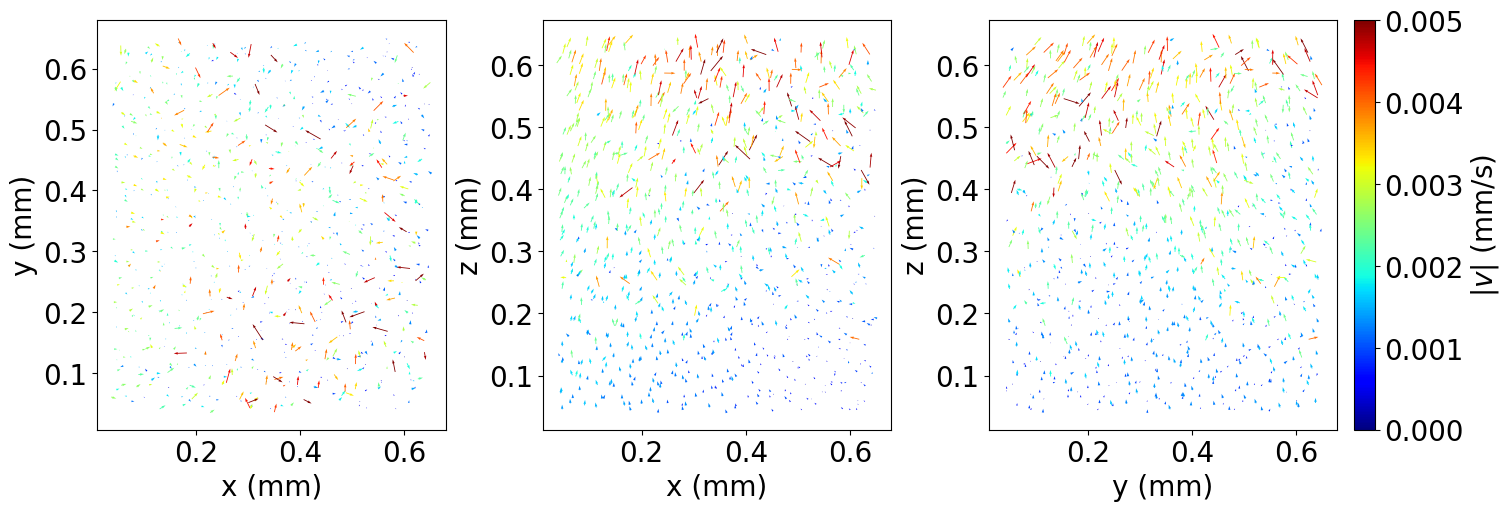

In [8]:
ProjVec3D(LCoord[mask],
          Lv[mask],
          cmap = 'jet',
          nameaxes=['z (mm)','y (mm)','x (mm)'], 
          colorbarlab=r'$|v|$ (mm/s)',
          scale=0.1,
          vmin=0, 
          vmax=0.005)

## E) Combine tracking

We can now combine the tracking between subsequent images over the whole time series. This way, the trajectory, velocity or for exmaple bubble volume can be observed for each individual bubble over time. To do so, we use the function **Combine_Tracking** giving as an input the directory and name of the track tables.

In [9]:
CombTrack = Combine_Tracking(nameTrack,
                            dirTrack,
                            imrange,
                            verbose=False,
                            endread='.tsv',
                            n0=3)

Some bubbles are lost and therefore not tracked over the whole time-series. The combined table is filled with '-1' as soon as, at one time step, the bubble is lost. In order to plot trajectory and tracked properties figures later, we will convert all the '-1' values by 'nan' values.

In [10]:
# Convert lost bubbles data into np.nan
for axis in ['z','y','x','dz','dy','dx','rad','vol']:
    for i in range(len(CombTrack[axis])):
        for j in range(len(CombTrack[axis][i])):
            if CombTrack[axis][i][j]==-1:
                CombTrack[axis][i][j]=np.nan

The bubble centroid coordinate is one of the tracked properties. We can observe each individual bubble trajectory as follow.

Text(0, 0.5, 'z (mm)')

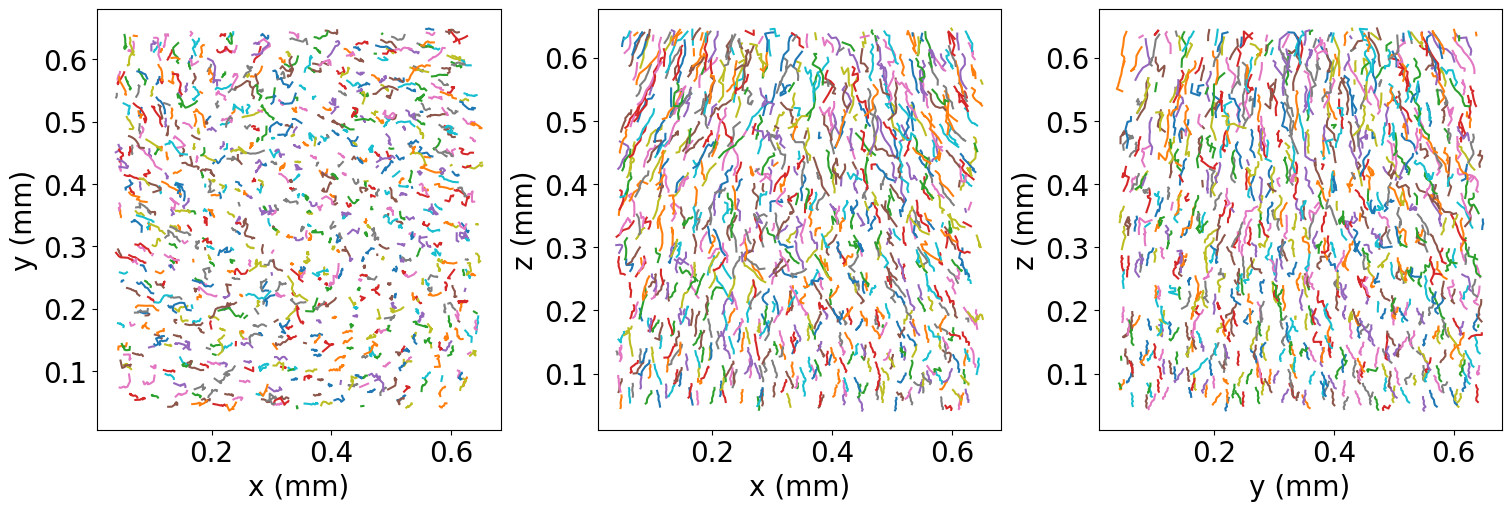

In [11]:
# Show the individual paths by a random color
fig, ax = plt.subplots(1,3, figsize = (5*3, 5), constrained_layout=True)
for i in range(0,len(CombTrack['x']),1):
    ax[0].plot(CombTrack['x'][i] * pizelsize, CombTrack['y'][i] * pizelsize)
    ax[1].plot(CombTrack['x'][i] * pizelsize, CombTrack['z'][i] * pizelsize)
    ax[2].plot(CombTrack['y'][i] * pizelsize, CombTrack['z'][i] * pizelsize)
# Axes
ax[0].set_xlabel('x (mm)'); ax[0].set_ylabel('y (mm)')
ax[1].set_xlabel('x (mm)'); ax[1].set_ylabel('z (mm)')
ax[2].set_xlabel('y (mm)'); ax[2].set_ylabel('z (mm)')

## F) Tracked properties

Here is a last example of the beauty of tracking. The individual bubble volume can be observed as a function of time, and their velocity norm as a function of the vertical position in the foam (since these images originates from a flow through a hopper constriction [Three-dimensional liquid foam flow through a hopper resolved by fast X-ray microtomography](https://pubs.rsc.org/en/content/articlelanding/2023/sm/d2sm01299e), it would be preferable to actually use a spherical coordinate basis, and not the cartesian (z,y,x) from our image).

Text(0, 0.5, '$|v|$ ($mm/s$)')

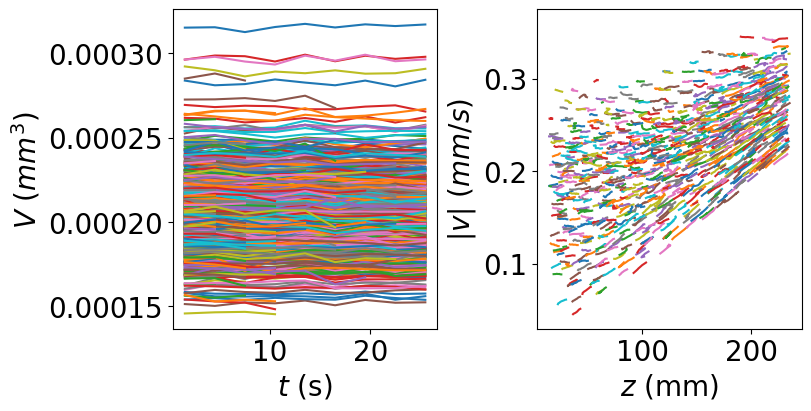

In [12]:
# Show the individual paths by a random color
fig, ax = plt.subplots(1,2, figsize = (4*2, 4), constrained_layout=True)

Ntstep = len(CombTrack['x'][0])
time = np.linspace(0.5,Ntstep-0.5,Ntstep) * timestep # s

for i in range(0,len(CombTrack['x']),1):
    
    Volume = CombTrack['vol'][i]*pizelsize
    ax[0].plot(time, CombTrack['vol'][i]*pizelsize**3)
    
    vz, vy, vx = CombTrack['z'][i], CombTrack['y'][i], CombTrack['x'][i]
    vnorm = np.sqrt(vx**2 + vy**2 + vz**2) *pizelsize/timestep #mm/s
    ax[1].plot(CombTrack['z'][i], vnorm)

ax[0].set_xlabel(r'$t$ (s)')
ax[0].set_ylabel(r'$V$ ($mm^3$)')

ax[1].set_xlabel(r'$z$ (mm)')
ax[1].set_ylabel(r'$|v|$ ($mm/s$)')

You have now completed this tutorial. I hope it has been helpfull to you. Go back to [FoamQuant - Examples](https://foamquant.readthedocs.io/en/latest/examples.html) for more examples and tutorials.